 - Description 
     - https://github.com/CSAILVision/ADE20K#explore-the-dataset
        1. image_name.jpg
        2. image_name_seg.png
        3. image_name_parts_{i}.png # parts on level i
        4. ./image_name # pngs showing occluded objects
        5. image_name.json
     - https://github.com/CSAILVision/ADE20K/blob/main/notebooks/ade20k_starter.ipynb
 - Download
     - 'http://data.csail.mit.edu/places/ADEchallenge/ADEChallengeData2016.zip'
         - '219e1696abb36c8ba3a3afe7fb2f4b4606a897c7'
     -  'http://data.csail.mit.edu/places/ADEchallenge/release_test.zip'
         - 'e05747892219d10e9243933371a497e905a4860c'
     - https://huggingface.co/datasets/helenlu/ade20k
     - https://www.kaggle.com/datasets/soumikrakshit/ade20k
         - https://www.kaggle.com/code/soumikrakshit/kernel6eb1ec8719
 - Subset containing 150 classes
     - http://sceneparsing.csail.mit.edu/#Download
     - https://github.com/CSAILVision/sceneparsing
     - https://github.com/CSAILVision/semantic-segmentation-pytorch

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np # for palette

In [3]:
ds_author = "soumikrakshit"
ds_name = "ade20k"
ds_path = f"./{ds_name}/ADE20K_2016_07_26"

In [4]:
%%time
!kaggle datasets download -d {ds_author}/{ds_name}
!unzip -nq -o ./{ds_name} -d {ds_name}

Dataset URL: https://www.kaggle.com/datasets/soumikrakshit/ade20k
License(s): unknown
100%|█████████████████████████████████████▉| 3.77G/3.78G [02:25<00:00, 37.8MB/s]
100%|██████████████████████████████████████| 3.78G/3.78G [02:25<00:00, 27.9MB/s]
caution:  both -n and -o specified; ignoring -o
CPU times: user 5.09 s, sys: 1.08 s, total: 6.17 s
Wall time: 3min 30s


In [10]:
!find . -maxdepth 4 -type d -ls
!ls -ash {ds_path}/images/training
!ls -ash {ds_path}/images/validation
!ls -ash {ds_path}/images/validation/a
!ls -ash {ds_path}/images/validation/a/abbey

   262150      4 drwxr-xr-x   4 root     root         4096 Jul 21 19:03 .
   262151      4 drwxr-xr-x   2 root     root         4096 Jul 21 18:59 ./.virtual_documents
   393217      4 drwxr-xr-x   3 root     root         4096 Jul 21 19:03 ./ade20k
   393218      4 drwxr-xr-x   3 root     root         4096 Jul 21 19:04 ./ade20k/ADE20K_2016_07_26
   393219      4 drwxr-xr-x   4 root     root         4096 Jul 21 19:03 ./ade20k/ADE20K_2016_07_26/images
   560733      4 drwxr-xr-x  29 root     root         4096 Jul 21 19:04 ./ade20k/ADE20K_2016_07_26/images/validation
   393220      4 drwxr-xr-x  29 root     root         4096 Jul 21 19:03 ./ade20k/ADE20K_2016_07_26/images/training
total 376K
4.0K .	 4.0K c  4.0K g  4.0K k     4.0K n	   4.0K q  4.0K u  4.0K z
4.0K ..  4.0K d  4.0K h  4.0K l     4.0K o	   4.0K r  4.0K v
4.0K a	 4.0K e  4.0K i  4.0K m     4.0K outliers  4.0K s  4.0K w
4.0K b	 4.0K f  4.0K j  264K misc  4.0K p	   4.0K t  4.0K y
total 140K
4.0K .	 4.0K c  4.0K g  4.0K k     4.0K

In [6]:
image_ex_path = f"{ds_path}/images/training/a/abbey"
image_ex_name = "ADE_train_000009"

In [ ]:
def get_image(path: str, name: str, img_only = True):
    ret = {}
    path = f"{path}/{name}"
    img_types = {
        "img": ".jpg",
        "seg": "_seg.png",
        "pts1": "_parts_1.png",
        "pts2": "_parts_2.png"
    }
    atr = "_atr.txt"
    for t, c in img_types.items():
        try:
            ret[t] = Image.open(f"{path}{c}")
        except:
            continue
    with open(f"{path}{atr}", "r") as file:
        ret["atr"] = file.read()
    return ret


def show_images(image_example, image_ex_images):
    fig, axes = plt.subplot_mosaic(
        [range(0, len(image_ex_images))],
        figsize=(15, 10)
    )
    for i, key in enumerate(image_ex_images):
        try:
            axes[i].imshow(image_example[key])
            axes[i].axis('off') 
            axes[i].set_title(key)
        except:
            continue
    fig.tight_layout()
    plt.show()
    
    
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

ADE_train_00000970


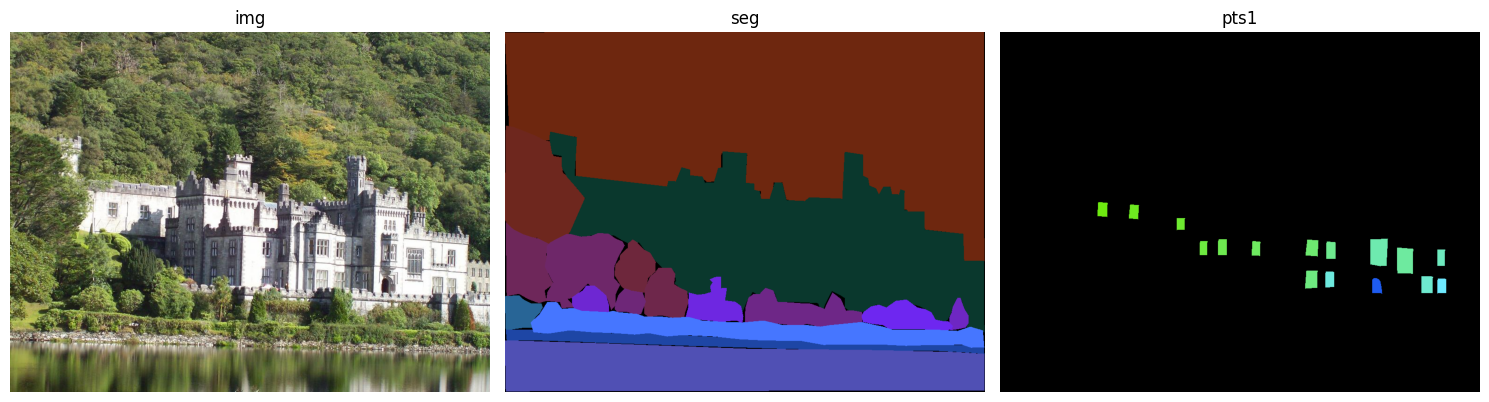

001 # 0 # 0 # tree # trees # ""
002 # 0 # 0 # tree # tree # ""
003 # 0 # 0 # building, edifice # building # ""
004 # 0 # 0 # tree # tree # ""
005 # 0 # 0 # tree # tree # ""
006 # 0 # 0 # tree # tree # ""
007 # 0 # 0 # tree # trees # ""
008 # 0 # 0 # tree # tree # ""
009 # 0 # 0 # tree # trees # ""
010 # 0 # 0 # grass # grass # ""
011 # 0 # 0 # earth, ground # ground # ""
012 # 0 # 0 # river # river water # ""
013 # 0 # 0 # tree # tree # ""
014 # 0 # 0 # tree # tree # ""
015 # 0 # 0 # tree # trees # ""
016 # 0 # 0 # tree # trees # ""
017 # 0 # 0 # plant, flora, plant life # plants # ""
001 # 1 # 0 # window # window # ""
002 # 1 # 0 # window # window # ""
003 # 1 # 0 # window # window # ""
004 # 1 # 0 # window # window # ""
005 # 1 # 0 # window # window # ""
006 # 1 # 0 # window # window # ""
007 # 1 # 0 # window # window # ""
008 # 1 # 0 # window # window # ""
009 # 1 # 0 # window # window # ""
010 # 1 # 0 # window # window # ""
011 # 1 # 0 # window # window # "bow"
012 # 1 # 0 # window

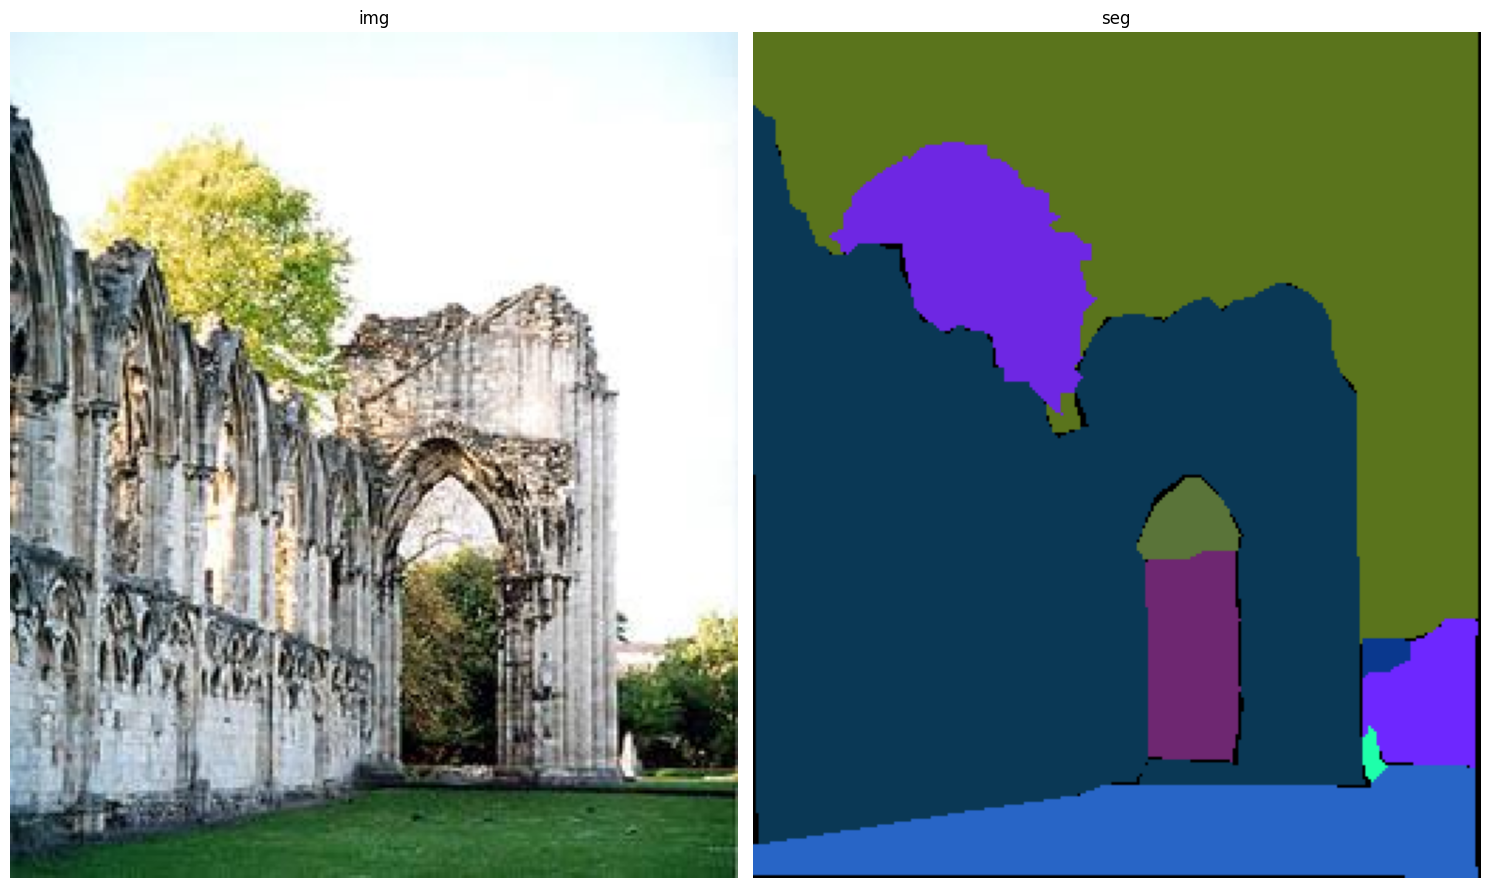

001 # 0 # 0 # sky # sky # ""
002 # 0 # 0 # sky # sky # ""
003 # 0 # 0 # building, edifice # building # ""
004 # 0 # 0 # tree # trees # ""
005 # 0 # 0 # building, edifice # building # ""
006 # 0 # 0 # fountain # fountain # ""
007 # 0 # 0 # grass # grass # ""
008 # 0 # 0 # tree # tree # ""
009 # 0 # 0 # tree # trees # ""

ADE_train_00000972


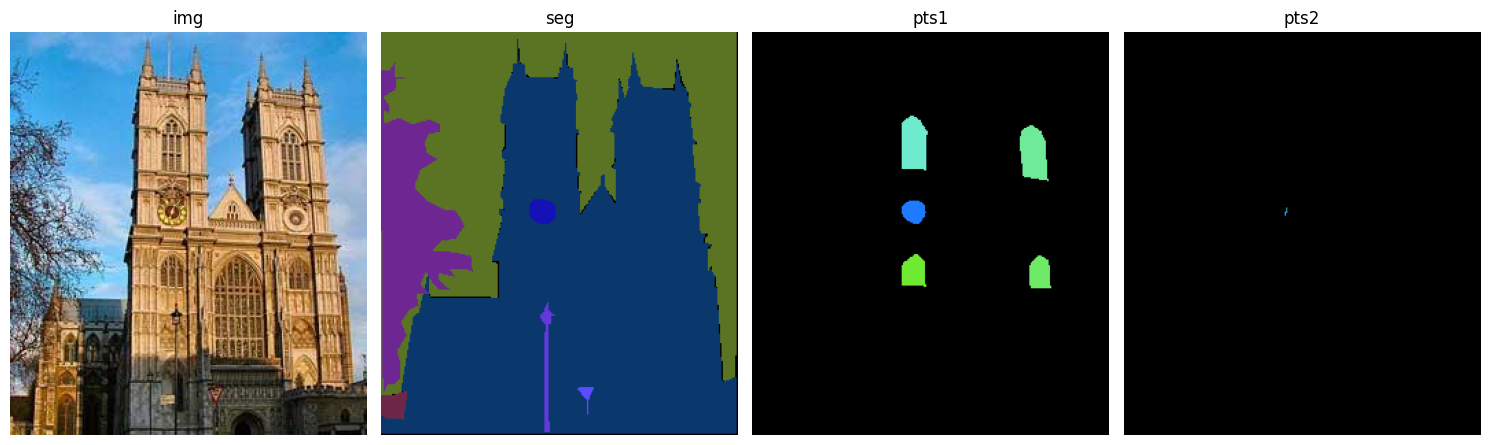

001 # 0 # 0 # sky # sky # ""
002 # 0 # 0 # tree # tree # ""
003 # 0 # 0 # building, edifice # building # ""
004 # 0 # 0 # tree # tree # ""
005 # 0 # 0 # clock # clock # ""
006 # 0 # 0 # streetlight, street lamp # street light # ""
007 # 0 # 0 # signboard, sign # sign # ""
001 # 1 # 0 # window # window # ""
002 # 1 # 0 # window # window # ""
003 # 1 # 0 # window # window # ""
004 # 1 # 0 # window # window # ""
005 # 1 # 0 # face # face # ""
001 # 2 # 0 # hand # hand # "minutes"
002 # 2 # 0 # hand # hand # "hours"

CPU times: user 2.88 s, sys: 843 ms, total: 3.72 s
Wall time: 2.59 s


In [8]:
%%time
for i in range(70, 73):
    img_name = f"{image_ex_name}{i}"
    image_example = get_image(image_ex_path, img_name, False)
    image_ex_images = [
        k for k in image_example.keys() if "atr" not in k
    ]
    print(img_name)
    show_images(image_example, image_ex_images)
    print(f"{image_example['atr']}")
del img_name, image_ex_images, image_example